In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict ,train_test_split
from sklearn.metrics import precision_score , recall_score ,f1_score ,precision_recall_curve,log_loss
import joblib

In [2]:
X = pd.read_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\parameters.csv")
y = pd.read_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\labels.csv")

In [3]:
y_n = y.to_numpy()

In [4]:
model_path = "models/mushroom_model.pkl"
model =joblib.load(model_path)

In [5]:
X_train ,X_test,y_train,y_test = train_test_split(
    X,y_n,
    test_size=0.2,
    random_state=5,
    shuffle=True,
)

In [6]:
X_train,X_val,y_train,y_val = train_test_split(
    X_train,y_train,
    test_size=0.0625,
    random_state=5,
    shuffle=True
    )

In [7]:
y_pred_train = model.predict(X_train)
y_pred_cv= model.predict(X_val)

In [8]:
logL_train = log_loss(y_train,y_pred_train)
logL_cv = log_loss(y_val,y_pred_cv)

In [9]:
print(f"The Training Set Loss is: {logL_train}")
print(f"The Cross Validation Test Loss is: {logL_cv}")

The Training Set Loss is: 1.2775396995197479
The Cross Validation Test Loss is: 1.400990061061091


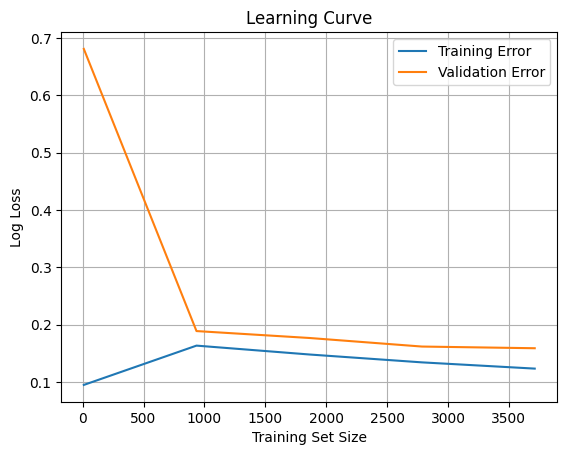

In [10]:
#learning Curve x= train size , y = log_loss (train and cv)
train_errors =[]
val_errors =[]
train_size = np.linspace(10,3712,5,dtype=int)

for size in train_size:
    X_subset = X_train[:size]
    y_subset = y_train[:size]


    model = LogisticRegression(max_iter=100,random_state=5,solver='liblinear')
    model.fit(X_subset,y_subset.ravel())

    y_subset_pred = model.predict_proba(X_subset)
    y_val_pred  = model.predict_proba(X_val)

    train_errors.append(log_loss(y_subset, y_subset_pred)) #loss on train set
    val_errors.append(log_loss(y_val, y_val_pred))#loss on cross validation


# Plot
plt.plot(train_size, train_errors, label="Training Error")
plt.plot(train_size, val_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

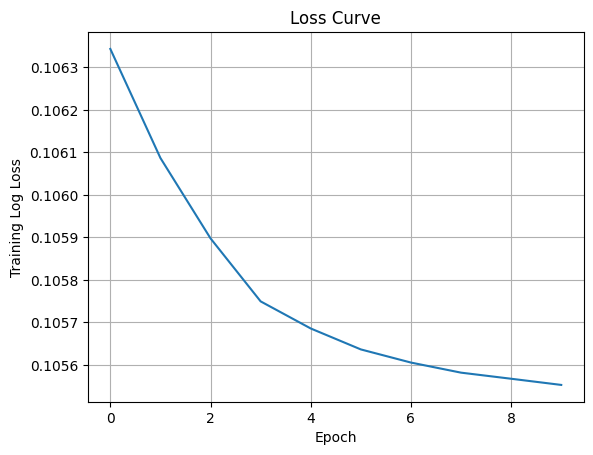

In [21]:

model = LogisticRegression(max_iter=1000, warm_start=True, random_state=5, solver='saga')
n_epoch = 10
losses = []

for epoch in range(n_epoch):
    model.fit(X_train, y_train.ravel())
    y_train_pred = model.predict_proba(X_train)
    loss = log_loss(y_train, y_train_pred)
    losses.append(loss)

# Plot
plt.plot(range(n_epoch), losses)
plt.xlabel("Epoch")
plt.ylabel("Training Log Loss")
plt.title("Loss Curve")
plt.grid(True)
plt.show()
